In [1]:
import sys
from pathlib import Path
prediction_mode_path = Path("../module")
sys.path.append(prediction_mode_path.as_posix())
import predictions_v05 as pred_mode

import pandas as pd
import numpy as np

from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

import joblib

import warnings
warnings.filterwarnings('ignore')

### model_type ==
#### RandomForestRegressor

#### DecisionTreeRegressor

#### KNeighborsRegressor

#### SVR

#### linear_model



In [2]:
molecular_descriptors_df = pred_mode.prepare_data('../Data/initial_caffeine.xlsx')

100%|██████████████████████████████████████████████████████████████████████████████████| 58/58 [00:02<00:00, 22.36it/s]


Data size (rows, columns): (58, 1613)
Data size after first reduction (rows, columns): (58, 1388)
Data size after second reduction (rows, columns): (58, 1137)


In [3]:
without_standarization, train_r2_, test_r2_, hist1, hist2 = pred_mode.prepare_data_and_create_model(molecular_descriptors_df=molecular_descriptors_df, 
                                                                                                    correlation_threshold=0.39, 
                                                                                                    standarization=False, 
                                                                                                    model_type='DecisionTreeRegressor',
                                                                                                    max_depth=5,
                                                                                                    train_test_split_=False, 
                                                                                                    verbose=True)

I am not doing standarization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z    0.087615
1                  AATS0are    0.342320
2                    AATS0d    0.109619
3                   AATS0dv    0.266240
4                    AATS0i    0.017757
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z    0.087615                    0.087615
1                  AATS0are    0.342320                    0.342320
2                    AATS0d    0.109619                    0.109619
3                   AATS0dv    0.266240                    0.266240
4                    AATS0i    0.017757                    0.017757
    molecular descriptor name  corr_value  absolute correlation value
30                     AATS2s    0.407553                    0.407553
74         

Target distribution histogram: 
AxesSubplot(0.125,0.11;0.775x0.77)


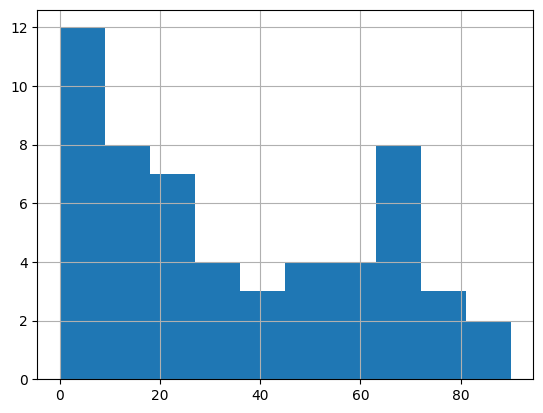

In [4]:
print('Target distribution histogram: ')
print(hist1['Aktywność cytoprotekcyjna [%]'].hist())

In [5]:
print("Number of features (molecular descriptors used): "+ str(len(hist2)))

Number of features (molecular descriptors used): 23


In [6]:
hist2

,molecular descriptor name,corr_value,absolute correlation value
30,AATS2s,0.407553,0.407553
74,AATS6s,0.427231,0.427231
89,AATSC0are,0.390300,0.390300
100,AATSC1Z,-0.435685,0.435685
106,AATSC1m,-0.428122,0.428122
121,AATSC2s,0.395319,0.395319
145,AATSC4s,-0.431682,0.431682
354,ATSC4are,-0.410892,0.410892
361,ATSC4pe,-0.393235,0.393235
362,ATSC4s,-0.482595,0.482595


In [7]:
with_standarization, train_r2__, test_r2__, hist1_, hist2_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df=molecular_descriptors_df, 
                                                                                                    correlation_threshold=0.39, 
                                                                                                    standarization=True, 
                                                                                                    model_type='DecisionTreeRegressor',
                                                                                                    max_depth=5,
                                                                                                    train_test_split_=False, 
                                                                                                    verbose=True)

I am doing standarization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z    0.087615
1                  AATS0are    0.342320
2                    AATS0d    0.109619
3                   AATS0dv    0.266240
4                    AATS0i    0.017757
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z    0.087615                    0.087615
1                  AATS0are    0.342320                    0.342320
2                    AATS0d    0.109619                    0.109619
3                   AATS0dv    0.266240                    0.266240
4                    AATS0i    0.017757                    0.017757
    molecular descriptor name  corr_value  absolute correlation value
30                     AATS2s    0.407553                    0.407553
74             

In [8]:
with_standarization.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 15,
 'splitter': 'best'}

In [9]:
with_standarization.predict(molecular_descriptors_df[hist2_['molecular descriptor name']])

array([70. , 70. , 70. , 70. , 70. , 32.1, 32.1, 32.1, 32.1, 32.1, 70. ,
       70. , 32.1, 32.1, 32.1, 70. , 32.1, 32.1, 32.1, 32.1, 32.1, 32.1,
       32.1, 70. , 70. , 32.1, 32.1, 70. , 70. , 70. , 70. , 70. , 70. ,
       70. , 70. , 70. , 70. , 70. , 70. , 70. , 70. , 70. , 70. , 70. ,
       32.1, 70. , 32.1, 32.1, 32.1, 32.1, 32.1, 70. , 70. , 32.1, 32.1,
       70. , 70. , 70. ])

In [10]:
len(with_standarization.predict(molecular_descriptors_df[hist2_['molecular descriptor name']]))

58

In [11]:
xs = r2_score(with_standarization.predict(molecular_descriptors_df[hist2_['molecular descriptor name']]), molecular_descriptors_df['Aktywność cytoprotekcyjna [%]'])

In [12]:
xs

-2.141494293538627

Target distribution histogram: 
AxesSubplot(0.125,0.11;0.775x0.77)


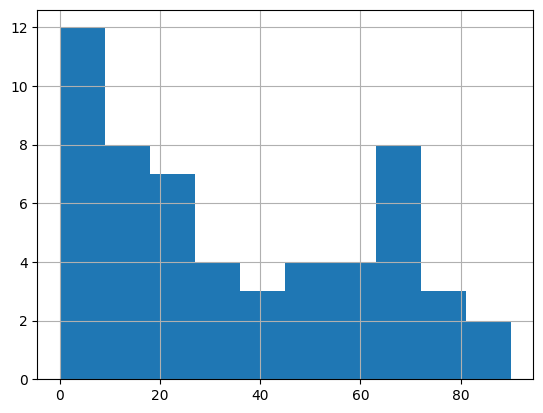

In [13]:
print('Target distribution histogram: ')
print(hist1_['Aktywność cytoprotekcyjna [%]'].hist())

In [14]:
print("Number of features (molecular descriptors used): "+ str(len(hist2)))

Number of features (molecular descriptors used): 23


In [15]:
hist2_

,molecular descriptor name,corr_value,absolute correlation value
30,AATS2s,0.407553,0.407553
74,AATS6s,0.427231,0.427231
89,AATSC0are,0.390300,0.390300
100,AATSC1Z,-0.435685,0.435685
106,AATSC1m,-0.428122,0.428122
121,AATSC2s,0.395319,0.395319
145,AATSC4s,-0.431682,0.431682
354,ATSC4are,-0.410892,0.410892
361,ATSC4pe,-0.393235,0.393235
362,ATSC4s,-0.482595,0.482595


## Search inside correlation space - selected test data

In [16]:
step = 0.01
initial_step = 0.3
last_step = 0.48
first_list = [x / 100.0 for x in range(int(initial_step*100), int(last_step*100), int(step*100))]
max_depth = [range(2, 30, 1)]
corr_th = []
second_list = []
third_list = []
f_list = []
fif_list = []
for i in first_list:
    for depth in max_depth[0]:
        
        without_standarization, train_r2, test_r2, _, h_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df=molecular_descriptors_df, 
                                                                                                    correlation_threshold=i, 
                                                                                                    standarization=False, 
                                                                                                    model_type='DecisionTreeRegressor',
                                                                                                    max_depth=depth,
                                                                                                    train_test_split_=False, 
                                                                                                    verbose=False)
        corr_th.append(i)
        second_list.append(train_r2)
        third_list.append(test_r2)
        f_list.append(len(h_))
        fif_list.append(depth)


In [17]:
df_without_standarization = pd.DataFrame(data=corr_th, columns=["Correlation threshold"])

In [18]:
df_without_standarization['Training data R^2 score'] = second_list
df_without_standarization['Test data R^2 score'] = third_list
df_without_standarization['Number of features'] = f_list
df_without_standarization['Depth number'] = fif_list

In [19]:
df_without_standarization.head()

,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features,Depth number
0,0.3,0.667740,-4.492158,87,2
1,0.3,0.779968,-2.162707,87,3
2,0.3,0.900016,-1.271139,87,4
3,0.3,0.942494,-34.760000,87,5
4,0.3,0.971995,-34.760000,87,6


## Plots

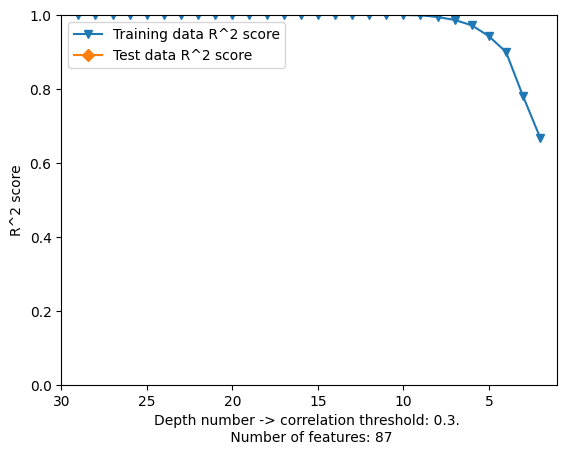

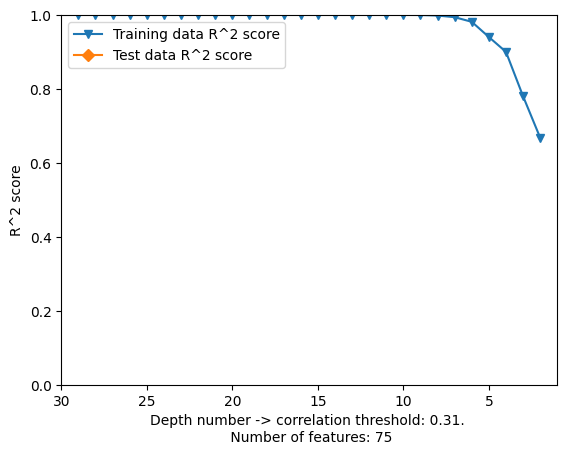

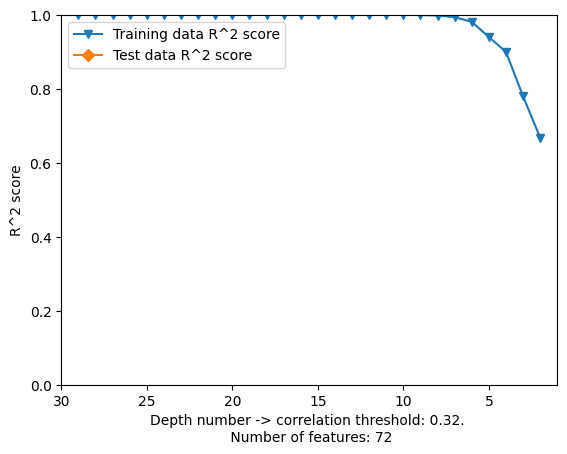

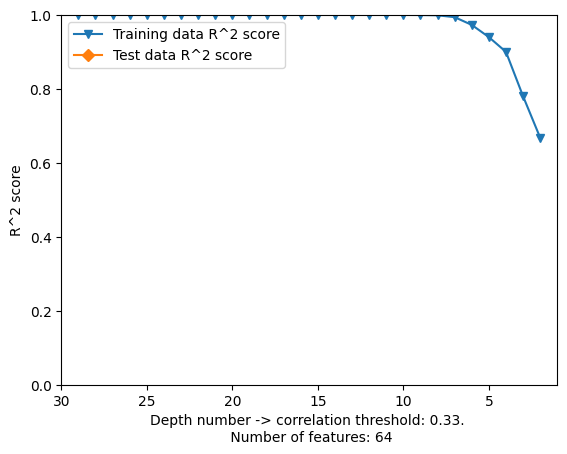

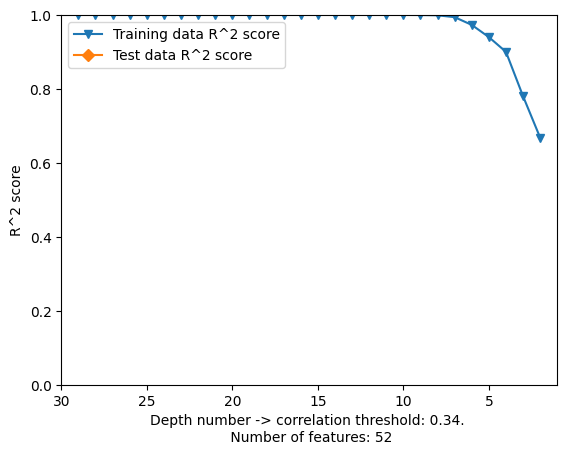

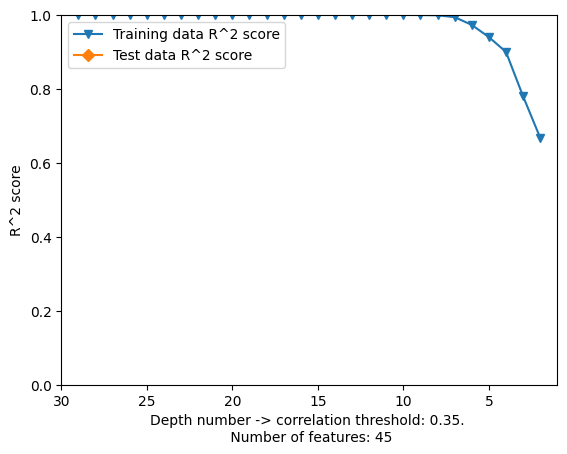

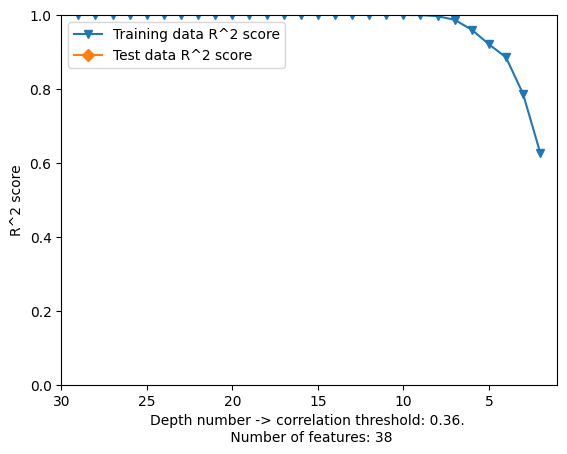

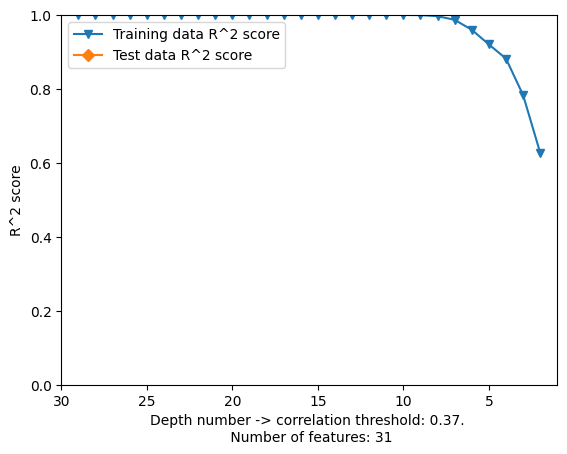

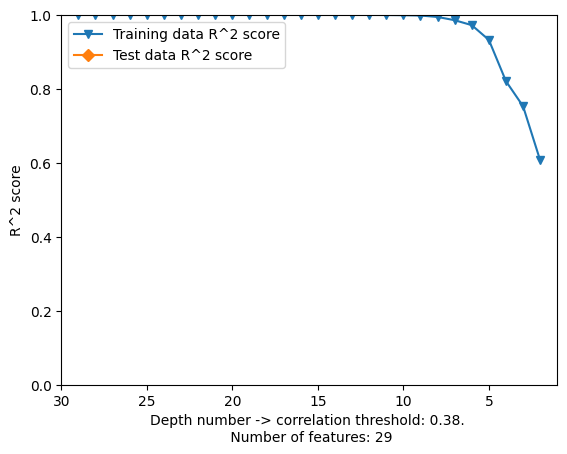

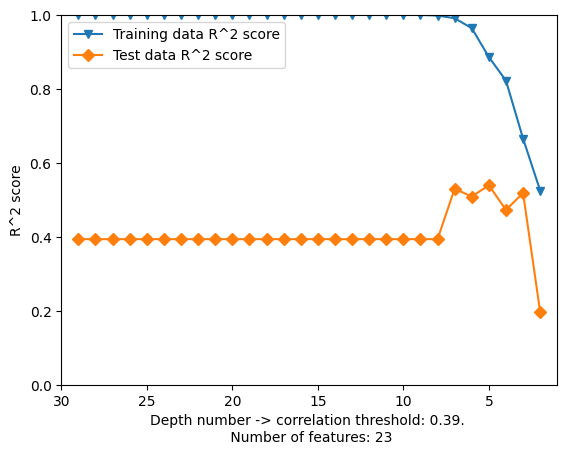

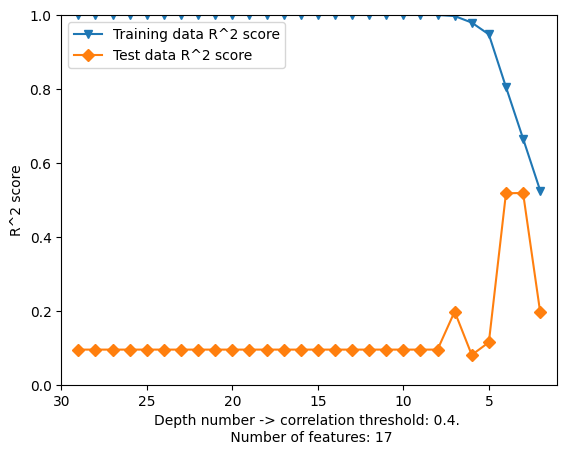

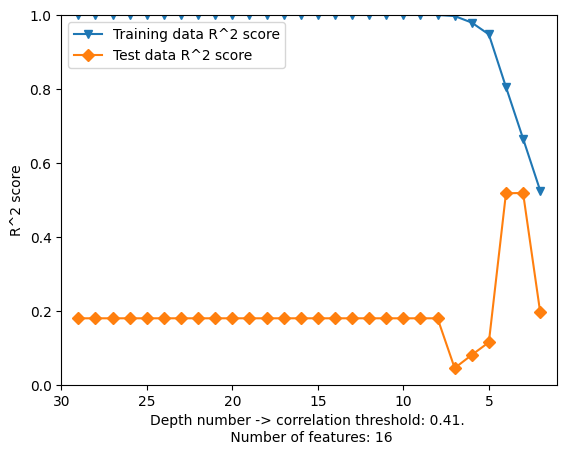

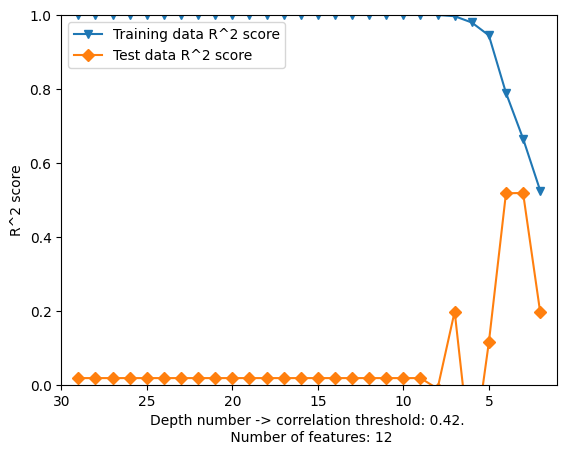

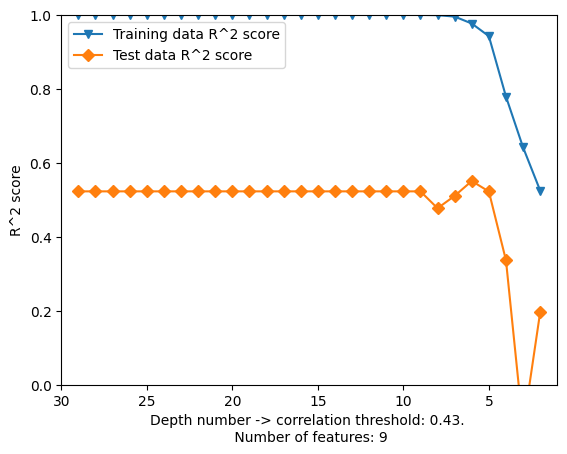

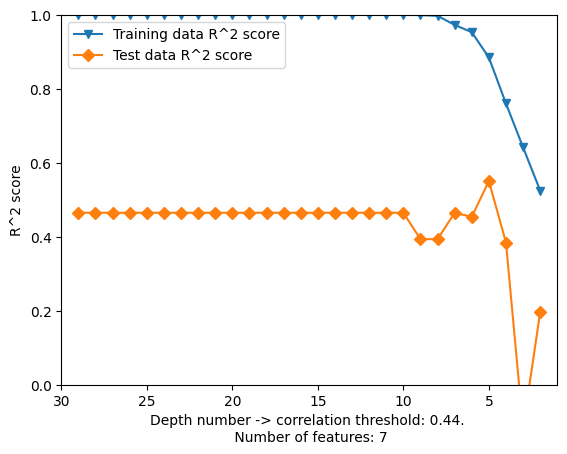

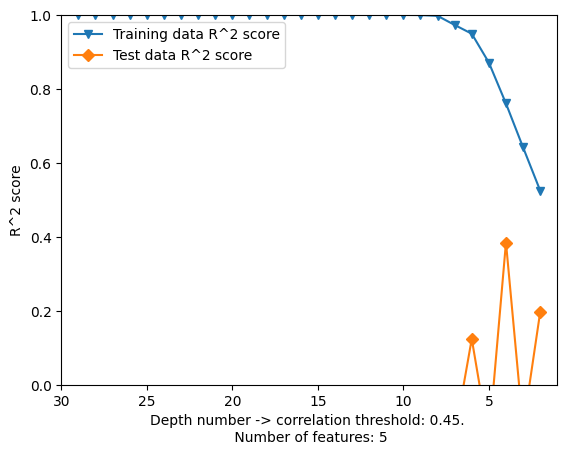

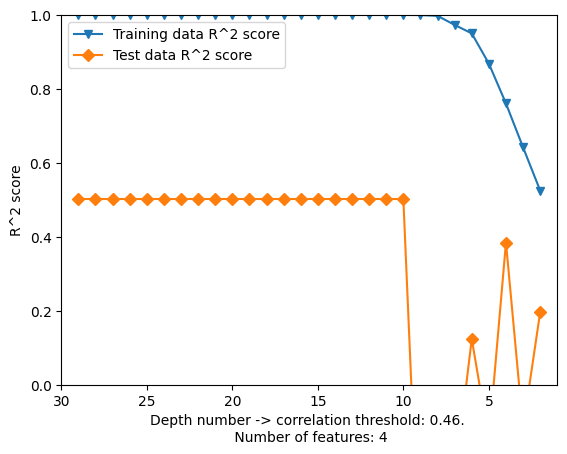

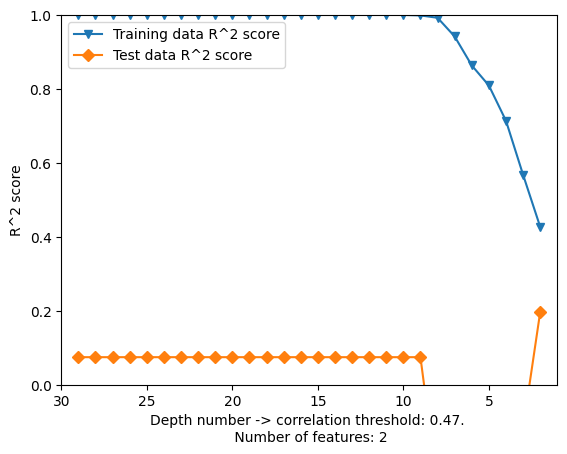

In [20]:
corre_list = [x / 100.0 for x in range(int(0.3*100), int(0.48*100), int(0.01*100))]
for element in corre_list:
    element_ = df_without_standarization[df_without_standarization['Correlation threshold'] == float(element)]
    plt.plot(element_['Depth number'], element_['Training data R^2 score'], label = "Training data R^2 score", marker='v')
    plt.plot(element_['Depth number'], element_['Test data R^2 score'], label = "Test data R^2 score", marker='D')
    plt.legend()
    plt.xlabel('Depth number -> correlation threshold: '+str(element)+'. \n Number of features: '+str(element_['Number of features'].iloc[0]))
    plt.xlim(max(element_['Depth number'])+1, min(element_['Depth number'])-1)
    plt.ylabel('R^2 score')
    plt.ylim([0, 1])
    plt.show()

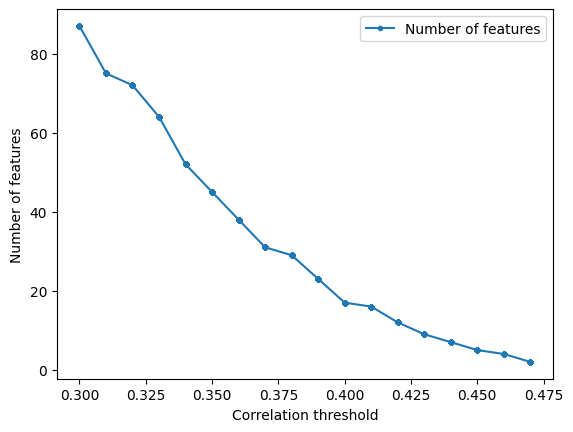

In [21]:
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['Number of features'], label = "Number of features", marker='.')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('Number of features')
plt.show()

In [22]:
picked_ = float(input("Please input selected correlation threshold "))
element_ = df_without_standarization[df_without_standarization['Correlation threshold'] == picked_]
element_

Please input selected correlation threshold 0.46


,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features,Depth number
448,0.46,0.524706,0.195780,4,2
449,0.46,0.641640,-0.117416,4,3
450,0.46,0.760358,0.384257,4,4
451,0.46,0.868303,-0.150038,4,5
452,0.46,0.950019,0.123383,4,6
453,0.46,0.972939,-0.260956,4,7
454,0.46,0.997482,-0.138906,4,8
455,0.46,0.999591,-0.575357,4,9
456,0.46,1.000000,0.501953,4,10
457,0.46,1.000000,0.501953,4,11


# sqrt(R^2)

In [23]:
r_a = df_without_standarization[df_without_standarization['Correlation threshold'] == picked_]

In [24]:
r_a['train R value'] = [np.sqrt(x) for x in r_a['Training data R^2 score']]

In [25]:
xcz = []
for element in r_a['Test data R^2 score']:
    x = np.sqrt(element)
    try:
        if x > 0:
            xcz.append(x)
        else:
            xcz.append(0)
    except:
        pass
    

In [26]:
xcz

[0.4424702846756687,
 0,
 0.619885000546925,
 0,
 0.3512595073800986,
 0,
 0,
 0,
 0.7084865030471647,
 0.7084865030471647,
 0.7084865030471647,
 0.7084865030471647,
 0.7084865030471647,
 0.7084865030471647,
 0.7084865030471647,
 0.7084865030471647,
 0.7084865030471647,
 0.7084865030471647,
 0.7084865030471647,
 0.7084865030471647,
 0.7084865030471647,
 0.7084865030471647,
 0.7084865030471647,
 0.7084865030471647,
 0.7084865030471647,
 0.7084865030471647,
 0.7084865030471647,
 0.7084865030471647]

In [27]:
r_a['test R value'] = xcz

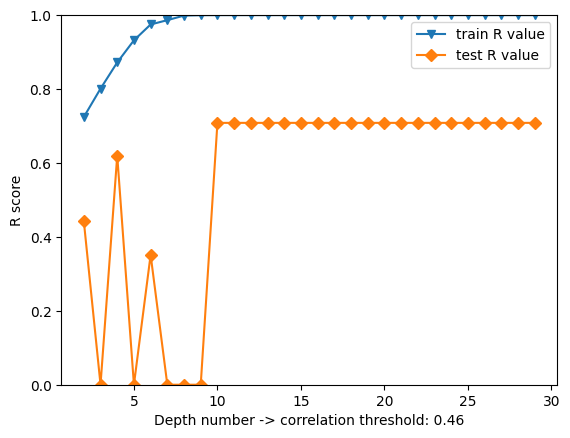

In [28]:
plt.plot(r_a['Depth number'], r_a['train R value'], label = "train R value", marker='v')
plt.plot(r_a['Depth number'], r_a['test R value'], label = "test R value", marker='D')
plt.legend()
plt.xlabel('Depth number -> correlation threshold: '+str(picked_))
plt.ylabel('R score')
plt.ylim([0, 1])
plt.show()

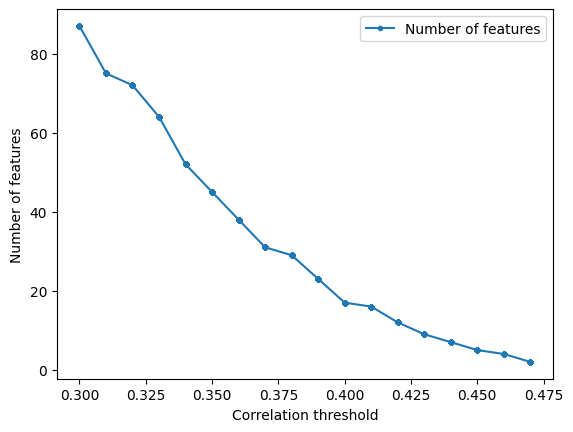

In [29]:
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['Number of features'], label = "Number of features", marker='.')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('Number of features')
plt.show()

# Search inside correlation space - train test split

In [30]:
step = 0.01
initial_step = 0.3
last_step = 0.48
first_list = [x / 100.0 for x in range(int(initial_step*100), int(last_step*100), int(step*100))]
max_depth = [range(2, 30, 1)]
corr_th = []
second_list = []
third_list = []
f_list = []
fif_list = []
for i in first_list:
    for depth in max_depth[0]:
        
        without_standarization, train_r2, test_r2, _, h_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df=molecular_descriptors_df, 
                                                                                                    correlation_threshold=i, 
                                                                                                    standarization=False, 
                                                                                                    model_type='DecisionTreeRegressor',
                                                                                                    max_depth=depth,
                                                                                                    train_test_split_=True, 
                                                                                                    verbose=False)
        corr_th.append(i)
        second_list.append(train_r2)
        third_list.append(test_r2)
        f_list.append(len(h_))
        fif_list.append(depth)
        
df_without_standarization = pd.DataFrame(data=corr_th, columns=["Correlation threshold"])
df_without_standarization['Training data R^2 score'] = second_list
df_without_standarization['Test data R^2 score'] = third_list
df_without_standarization['Number of features'] = f_list
df_without_standarization['Depth number'] = fif_list
df_without_standarization.head()

,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features,Depth number
0,0.3,0.685567,-3.788189,87,2
1,0.3,0.794182,-2.428870,87,3
2,0.3,0.921599,-6.813127,87,4
3,0.3,0.979942,-1.773688,87,5
4,0.3,0.997783,-3.817463,87,6


## Plots

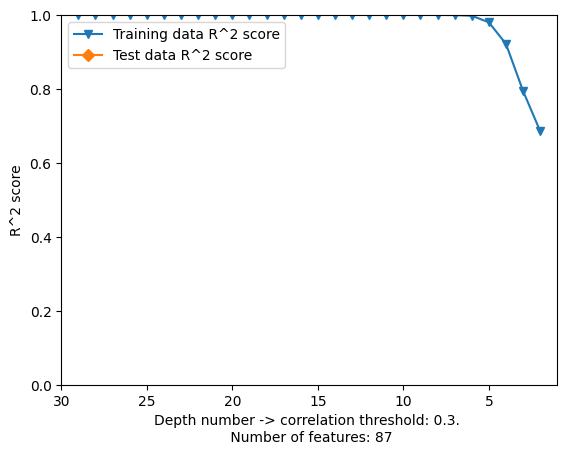

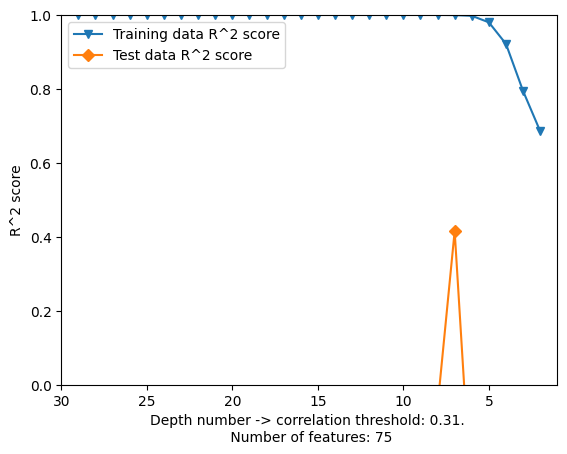

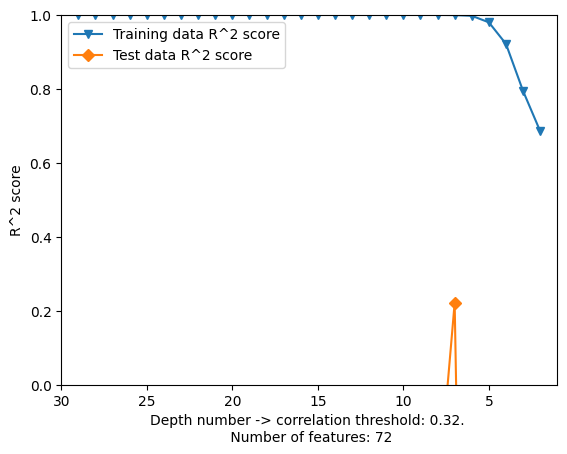

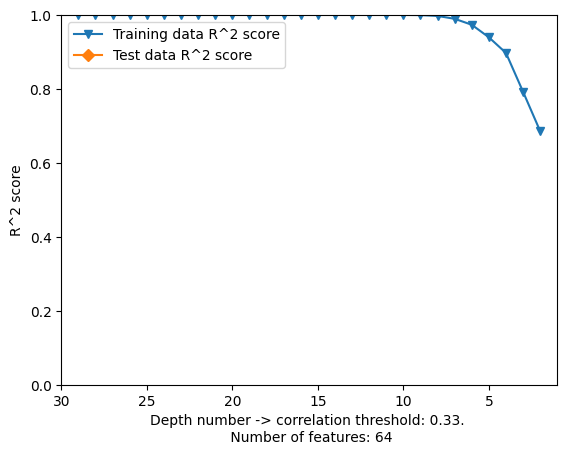

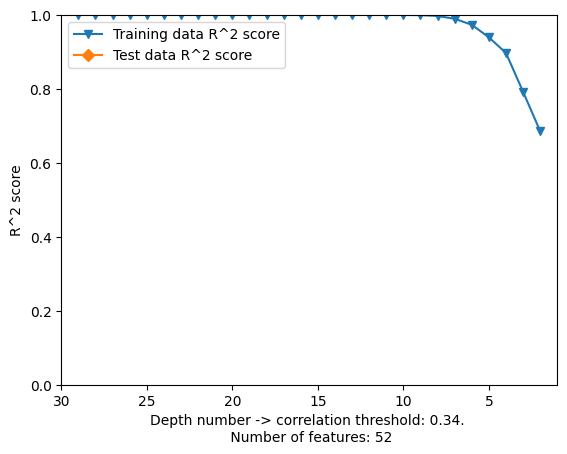

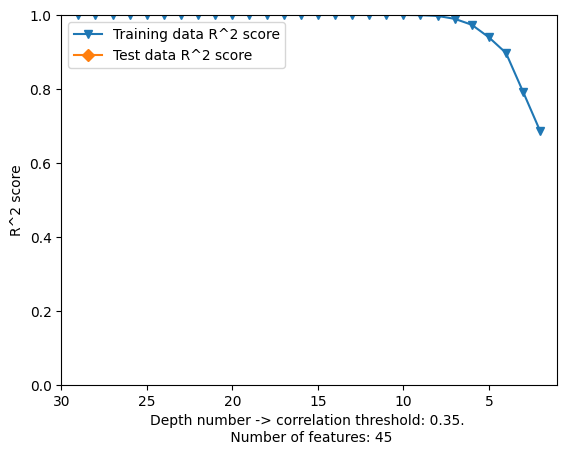

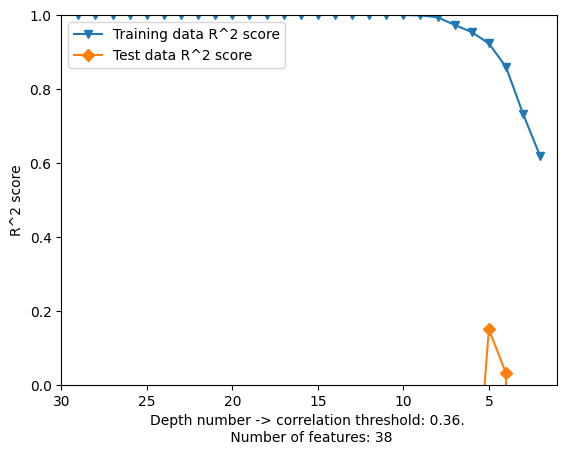

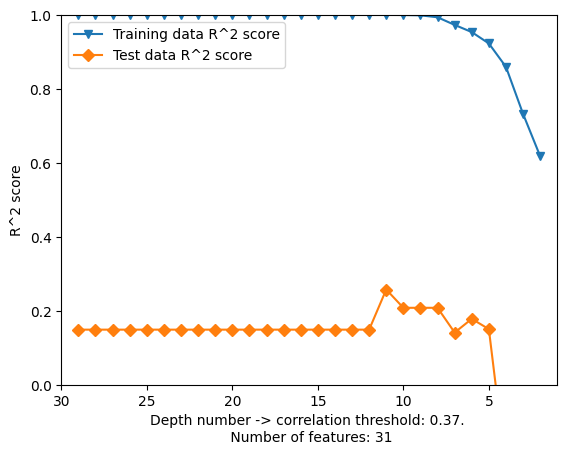

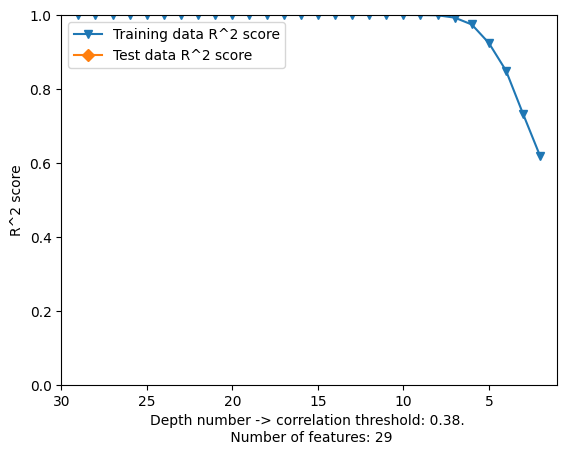

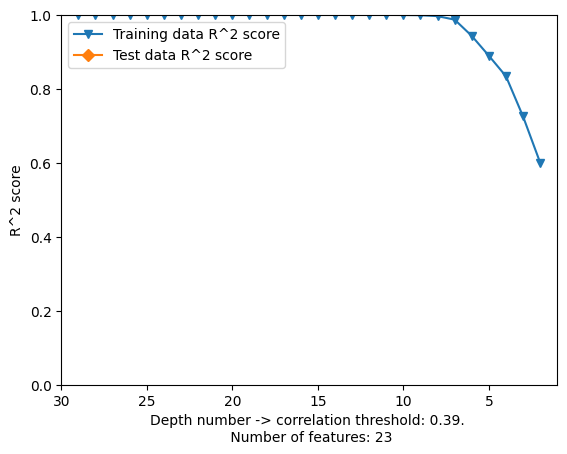

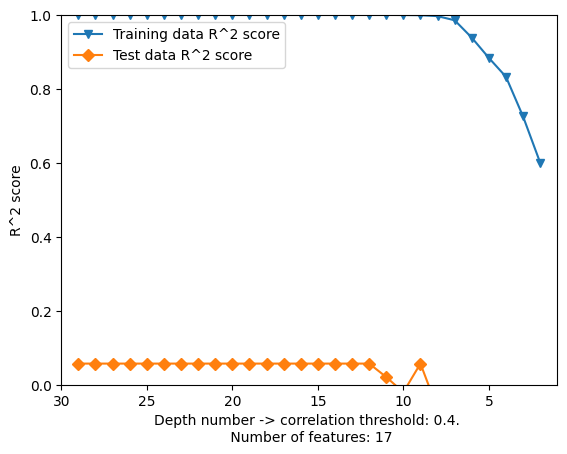

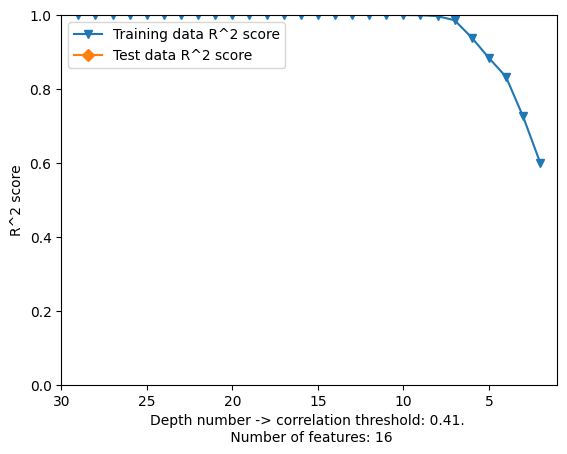

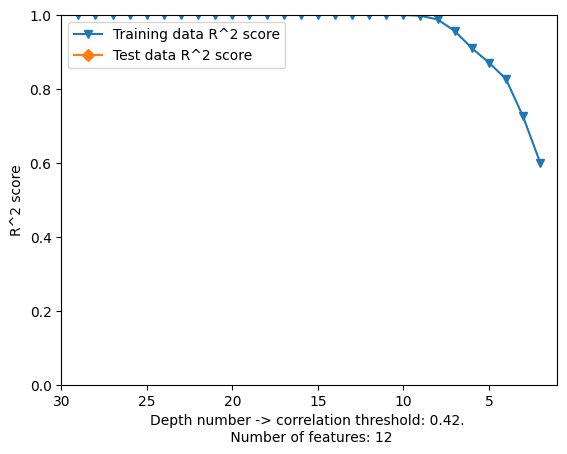

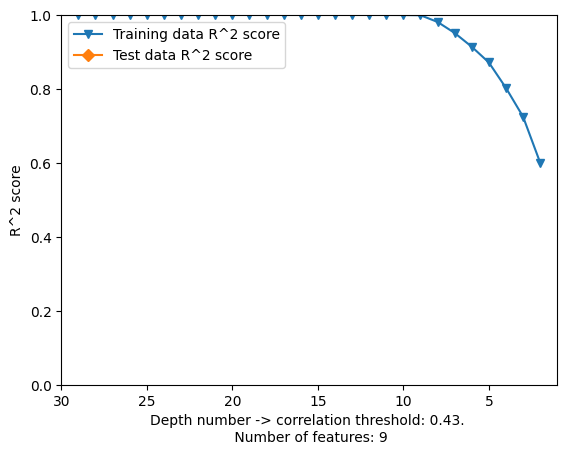

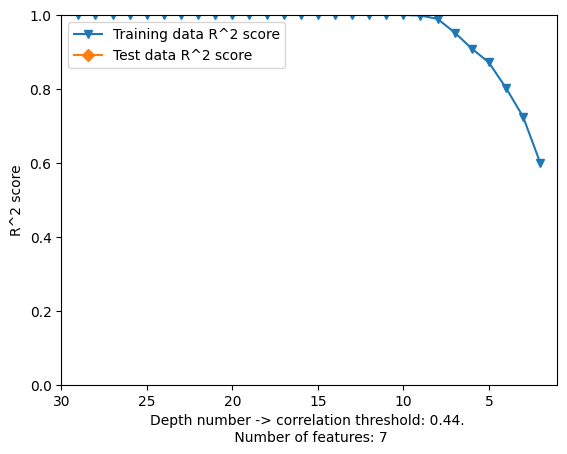

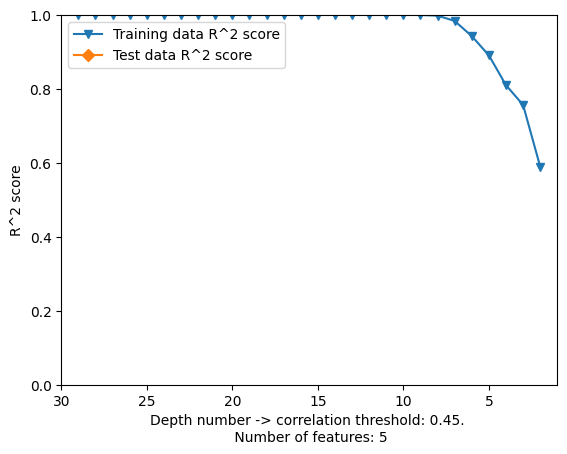

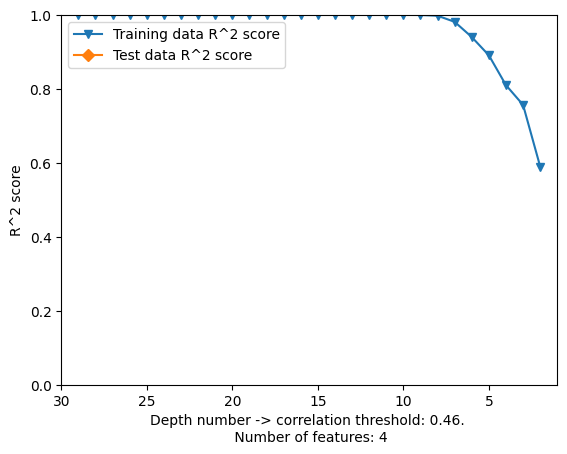

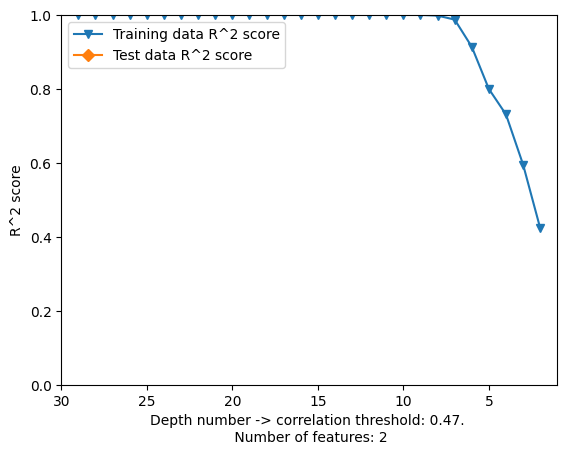

In [31]:
corre_list = [x / 100.0 for x in range(int(0.3*100), int(0.48*100), int(0.01*100))]
for element in corre_list:
    element_ = df_without_standarization[df_without_standarization['Correlation threshold'] == float(element)]
    plt.plot(element_['Depth number'], element_['Training data R^2 score'], label = "Training data R^2 score", marker='v')
    plt.plot(element_['Depth number'], element_['Test data R^2 score'], label = "Test data R^2 score", marker='D')
    plt.legend()
    plt.xlabel('Depth number -> correlation threshold: '+str(element)+'. \n Number of features: '+str(element_['Number of features'].iloc[0]))
    plt.xlim(max(element_['Depth number'])+1, min(element_['Depth number'])-1)
    plt.ylabel('R^2 score')
    plt.ylim([0, 1])
    plt.show()

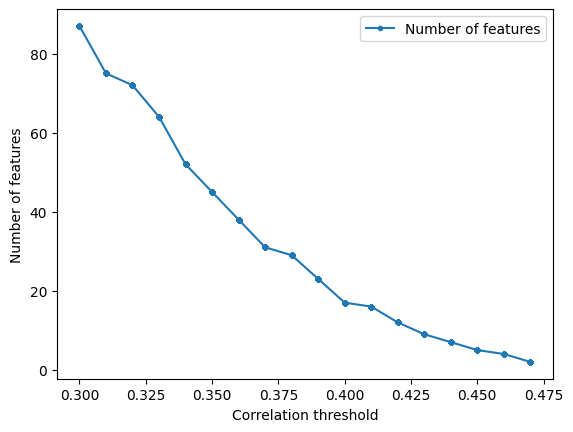

In [32]:
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['Number of features'], label = "Number of features", marker='.')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('Number of features')
plt.show()

In [33]:
picked_ = float(input("Please input selected correlation threshold "))
element_ = df_without_standarization[df_without_standarization['Correlation threshold'] == picked_]
element_

Please input selected correlation threshold 0.46


,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features,Depth number
448,0.46,0.589770,-3.975400,4,2
449,0.46,0.756536,-5.239173,4,3
450,0.46,0.809973,-10.626455,4,4
451,0.46,0.890732,-13.717529,4,5
452,0.46,0.940149,-7.049342,4,6
453,0.46,0.981262,-11.700484,4,7
454,0.46,0.997817,-13.445000,4,8
455,0.46,0.999800,-3.508777,4,9
456,0.46,1.000000,-3.359857,4,10
457,0.46,1.000000,-3.359857,4,11


## sqrt(R^2)

In [34]:
r_a = df_without_standarization[df_without_standarization['Correlation threshold'] == picked_]
r_a['train R value'] = [np.sqrt(x) for x in r_a['Training data R^2 score']]
xcz = []
for element in r_a['Test data R^2 score']:
    x = np.sqrt(element)
    try:
        if x > 0:
            xcz.append(x)
        else:
            xcz.append(0)
    except:
        pass
    
r_a['test R value'] = xcz

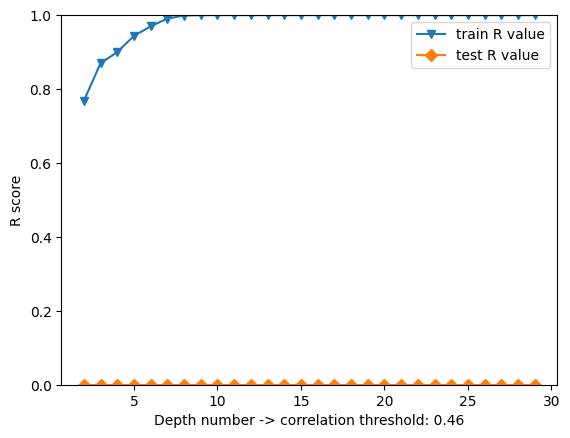

In [35]:
plt.plot(r_a['Depth number'], r_a['train R value'], label = "train R value", marker='v')
plt.plot(r_a['Depth number'], r_a['test R value'], label = "test R value", marker='D')
plt.legend()
plt.xlabel('Depth number -> correlation threshold: '+str(picked_))
plt.ylabel('R score')
plt.ylim([0, 1])
plt.show()

In [ ]:
stop

## Final model

In [ ]:
final_model = pred_mode.prepare_data_and_create_model(molecular_descriptors_df=molecular_descriptors_df,
                                                      correlation_threshold=0.39,
                                                      standarization=False, 
                                                      model_type='DecisionTreeRegressor',
                                                      max_depth=5,
                                                      train_test_split_=False,
                                                      verbose=True)

In [ ]:
final_model[0].get_params()

In [ ]:
final_model[0]

In [ ]:
final_model[0].tree_

In [ ]:
final_model[4]['molecular descriptor name'].to_list()

In [ ]:
from sklearn import tree

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(final_model[0], 
                   feature_names = final_model[4]['molecular descriptor name'].to_list(),
                   filled=True)

## Predict target feature

In [ ]:
to_prediction = pred_mode.prepare_data('../Data/Proposed_structures_with_AI_indole_tanimoto_similarity_.xlsx')

In [ ]:
predicted_activity = final_model[0].predict(to_prediction[final_model[4]['molecular descriptor name']])

In [ ]:
smiles = pd.read_excel('../Data/Proposed_structures_with_AI_indole_tanimoto_similarity_.xlsx')
smiles = smiles['new_SMILES']
smiles = smiles.to_list()
save_to_df = pd.DataFrame(data=smiles, columns=['SMILES'])

In [ ]:
print(len(smiles))
print(len(predicted_activity))

In [ ]:
save_to_df.head()

In [ ]:
save_to_df['Predicted activity'] = predicted_activity

In [ ]:
save_to_df.head()

In [ ]:
save_to_df.to_excel('../Data/Predicted_activity_decision_tree.xlsx')